In [29]:
%matplotlib inline
from skimage.io import imread
from skimage import img_as_float
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

In [6]:
img = img_as_float(imread('data/parrots.jpg'))

In [44]:
x, y, z = img.shape
features = np.reshape(img, (x * y, z))

In [50]:
psnrs = []
for n_colors in range(3, 20):
    kmeans = KMeans(n_clusters=n_colors, init='k-means++', random_state=241)
    kmeans.fit(features)
    labels = kmeans.labels_.reshape(img.shape[0], img.shape[1])
    img_median = img.copy()
    img_mean = img.copy()
    for i in range(kmeans.n_clusters):
        img_median[labels==i] = np.median(img[labels==i], axis=0)
        img_mean[labels==i] = np.mean(img[labels==i], axis=0)
    psnrs.append([
        n_colors, 
        10 * math.log10(float(1) / np.mean((img - img_median) ** 2)),
        10 * math.log10(float(1) / np.mean((img - img_mean) ** 2))
    ])

In [51]:
psnrs_pd = pd.DataFrame(psnrs)
psnrs_pd.columns = ['n_colors', 'psnr_median', 'psnr_mean']
print(psnrs_pd)

    n_colors  psnr_median  psnr_mean
0          3    12.688395  13.208120
1          4    14.054909  14.416314
2          5    15.251978  15.590879
3          6    16.116477  16.606634
4          7    17.402788  17.698938
5          8    18.179013  18.484545
6          9    18.877886  19.166791
7         10    19.470240  19.696745
8         11    19.917841  20.182105
9         12    20.362662  20.651755
10        13    20.855916  21.077417
11        14    21.177324  21.383827
12        15    21.397840  21.633537
13        16    21.733163  21.918566
14        17    21.976258  22.177094
15        18    22.196866  22.389387
16        19    22.422061  22.576762


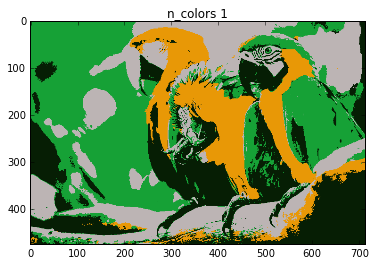

In [49]:
kmeans = KMeans(n_clusters=11, init='k-means++', random_state=241)
kmeans.fit(features)
labels = kmeans.labels_.reshape(img.shape[0], img.shape[1])
img_median = img.copy()
img_mean = img.copy()
for i in range(kmeans.n_clusters):
    img_median[labels==i] = np.median(img[labels==i], axis=0)
    img_mean[labels==i] = np.mean(img[labels==i], axis=0)
plt.imshow(img_median)
plt.imshow(img_mean)
plt.show()